In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq

In [35]:
class Graph:
    def __init__(self, nodes = None, edges = None):
        if (type(edges) or type(nodes)) is not list:
            raise TypeError("Type of nodes should be a list, type of edges should be a list of tuples.")
        elif not all(isinstance(x, tuple) for x in edges):
            raise TypeError("Type of Edges should be list of tuples")
        elif nodes and edges is None:
            self.vertex = []
            self.edges = []
        elif not (all(x[0] in nodes for x in edges) and all(x[1] in nodes for x in edges)):
            raise ValueError("There is extra vertex in edge list")
        else:
            self.vertex = nodes
            self.edges = edges
    
    def add_vertex(self, vert):
        if vert in self.vertex:
            print("This node ({}) is already in vertex list".format(vert))
            print("Adding node named {} to list".format("second " + str(vert)))
            print("If you wish to delete this node use function: remove_vert('{}') ".format("second " + str(vert)))
            self.vertex.append("second " + str(vert))
        else:
            self.vertex.append(vert)
            
    def remove_vert(self, vert):     #Additional function
        vert = str(vert)
        self.vertex.remove(vert)
        
    def add_vertices_from_list(self, vert_list):
        if type(vert_list) is not list:
            raise TypeError("Vertex list should be a list type")
        for i in vert_list:
            self.add_vertex(i)

    def add_edge(self, from_vert, to_vert, weight = None):
        if weight is None and len(self.edges[0]) == 3:
            raise ValueError("You are missing weight of the node")
        if weight is None:
            if (from_vert, to_vert) in self.edges or (to_vert, from_vert) in edges:
                print("Edge {} already exists".format(from_vert, to_vert))
        else:
            if (from_vert, to_vert, weight) in edges or (to_vert, from_vert, weight) in edges:
                print("Edge {} already exists".format(from_vert, to_vert, weight))
        if not from_vert in self.vertex:
            self.add_vertex(from_vert)
        if not to_vert in self.vertex:
            self.add_vertex(to_vert)
        if weight is not None:
            if len(self.edges[0]) == 2:
                for i in range(len(self.edges)):
                    self.edges[i] = self.edges[i] + (1,)
            self.edges.append((from_vert, to_vert, weight))
        else:
            self.edges.append((from_vert, to_vert))
            
    def add_edges_from_list(self, edge_list):
        if type(edge_list) != list:
            raise TypeError("Edge list should be a list type")
        for i in edge_list:
            self.add_edge(i[0], i[1])
            
    def get_vertices(self):
        return self.vertex
    
    def get_edges(self):
        return self.edges
     
    def get_neighbors(self, vert_key):
        list_of_neighbors = []
        for i in self.edges:
            if vert_key in i:
                list_of_neighbors.append(i[0])
                list_of_neighbors.append(i[1])
                list_of_neighbors.remove(vert_key)
        if list_of_neighbors == []:
            return "Node {} has no neighbors".format(vert_key)
        return list_of_neighbors
    
    def __contains__(self, vert):
        return vert in self.vertex
        
    def save_graph(self):
        nodes_from_edges = []
        for i in self.edges:
            for j in i:
                nodes_from_edges.append(j)
        long_str = "graph ethane { \n "
        if len(self.edges[0]) == 2:
            for i in edges:
                long_str += str(i[0]) + " -- " + str(i[1]) + "; \n "
        else:
            for i in edges:
                long_str += str(i[0]) + " -- " + str(i[1]) + "[label = {}]".format(i[2]) + "; \n "   
        for v in self.vertex:
            if v not in nodes_from_edges and len(self.edges[0]) == 3:
                long_str += str(v) + " -- " + str(v) + "[label = 1]" + "; \n " 
            elif v not in nodes_from_edges and len(self.edges[0]) == 2:
                long_str += str(v) + " -- " + str(v)  + "; \n " 
        long_str += "}"
        f = open("Graph.txt", "w")
        f.write(long_str)
        f.close()
        
    def __str__(self):
        nodes_from_edges = []
        for i in self.edges:
            for j in i:
                nodes_from_edges.append(j)
        long_str = "graph ethane { \n "
        if len(self.edges[0]) == 2:
            for i in edges:
                long_str += str(i[0]) + " -- " + str(i[1]) + "; \n "
        else:
            for i in edges:
                long_str += str(i[0]) + " -- " + str(i[1]) + "[label = {}]".format(i[2]) + "; \n "   
        for v in self.vertex:
            if v not in nodes_from_edges and len(self.edges[0]) == 3:
                long_str += str(v) + " -- " + str(v) + "[label = 1]" + "; \n " 
            elif v not in nodes_from_edges and len(self.edges[0]) == 2:
                long_str += str(v) + " -- " + str(v)  + "; \n " 
        long_str += "}"
        return long_str
    
    def shortest_path(self, from_vert, to_vert):  #Dixtra method
        if from_vert not in self.vertex:
            return "Starting vertex not in graph"
        if to_vert not in self.vertex:
            return "Ending vertex not in graph"
        dist = {v: float('inf') for v in self.vertex}
        prev = {v: None for v in self.vertex}
        dist[from_vert] = 0
        pq = [(0, from_vert)]
        while pq:
            (d, u) = heapq.heappop(pq)    #usówa i zwraca najmniejszy lub pierwszy element z listy
            if d > dist[u]:
                continue
            for v in self.get_neighbors(u):
                alt = dist[u] + 1
                if alt < dist[v]:
                    dist[v] = alt
                    prev[v] = u
                    heapq.heappush(pq, (alt, v))   #Dodaje element na początek listy
        path = []
        u = to_vert
        while prev[u]:
            path.append(u)
            u = prev[u]
        path.append(from_vert)
        path.reverse()
        if dist[to_vert] == float('inf'):
            return "No path between nodes"
        else:
            return path

    def get_shortest_path(self, from_vert):
        track = []
        for i in self.vertex:
            track.append(self.shortest_path(from_vert, i))
        return track

In [36]:
nodes = ["Alice", "Bob", "Carl", "David", "Ernst", "Frank", "Gail", "Harry", "Irene"]
edges = [("Alice", "Bob"),
("Bob", "Gail"),
("Irene", "Gail"),
("Carl", "Alice"),
("Gail", "Harry"),
("Alice", "David"),
("Ernst", "Frank"),
("Alice", "Ernst"),
("David", "Carl"),
("Alice", "Frank"),
("Harry", "Irene"),
("Carl", "Frank")]

In [37]:
G = Graph(nodes, edges)

In [38]:
G.add_vertex("Jen")

In [39]:
G.add_edges_from_list([("Jen", "Gail"), ("Irene", "Jen"), ("Harry", "Jen")])

In [40]:
G.get_vertices()

['Alice',
 'Bob',
 'Carl',
 'David',
 'Ernst',
 'Frank',
 'Gail',
 'Harry',
 'Irene',
 'Jen']

In [41]:
G.get_edges()

[('Alice', 'Bob'),
 ('Bob', 'Gail'),
 ('Irene', 'Gail'),
 ('Carl', 'Alice'),
 ('Gail', 'Harry'),
 ('Alice', 'David'),
 ('Ernst', 'Frank'),
 ('Alice', 'Ernst'),
 ('David', 'Carl'),
 ('Alice', 'Frank'),
 ('Harry', 'Irene'),
 ('Carl', 'Frank'),
 ('Jen', 'Gail'),
 ('Irene', 'Jen'),
 ('Harry', 'Jen')]

In [42]:
G.add_vertex("Poul")
G.get_vertices()

['Alice',
 'Bob',
 'Carl',
 'David',
 'Ernst',
 'Frank',
 'Gail',
 'Harry',
 'Irene',
 'Jen',
 'Poul']

In [43]:
G.remove_vert("Poul")
G.get_vertices()

['Alice',
 'Bob',
 'Carl',
 'David',
 'Ernst',
 'Frank',
 'Gail',
 'Harry',
 'Irene',
 'Jen']

In [44]:
G.get_neighbors("Alice")

['Bob', 'Carl', 'David', 'Ernst', 'Frank']

In [45]:
"Poul" in G

False

In [46]:
"Alice" in G

True

In [47]:
G.add_edge("Adam", "Alice", 3)

Program automaticly will add node "Adam" and give every other node a waight 1.

In [48]:
G.get_edges()

[('Alice', 'Bob', 1),
 ('Bob', 'Gail', 1),
 ('Irene', 'Gail', 1),
 ('Carl', 'Alice', 1),
 ('Gail', 'Harry', 1),
 ('Alice', 'David', 1),
 ('Ernst', 'Frank', 1),
 ('Alice', 'Ernst', 1),
 ('David', 'Carl', 1),
 ('Alice', 'Frank', 1),
 ('Harry', 'Irene', 1),
 ('Carl', 'Frank', 1),
 ('Jen', 'Gail', 1),
 ('Irene', 'Jen', 1),
 ('Harry', 'Jen', 1),
 ('Adam', 'Alice', 3)]

In [49]:
G.save_graph()

In [50]:
G.get_shortest_path("Bob")

[['Bob', 'Alice'],
 ['Bob'],
 ['Bob', 'Alice', 'Carl'],
 ['Bob', 'Alice', 'David'],
 ['Bob', 'Alice', 'Ernst'],
 ['Bob', 'Alice', 'Frank'],
 ['Bob', 'Gail'],
 ['Bob', 'Gail', 'Harry'],
 ['Bob', 'Gail', 'Irene'],
 ['Bob', 'Gail', 'Jen'],
 ['Bob', 'Alice', 'Adam']]

In [52]:
print(str(G))

graph ethane { 
 Alice -- Bob[label = 1]; 
 Bob -- Gail[label = 1]; 
 Irene -- Gail[label = 1]; 
 Carl -- Alice[label = 1]; 
 Gail -- Harry[label = 1]; 
 Alice -- David[label = 1]; 
 Ernst -- Frank[label = 1]; 
 Alice -- Ernst[label = 1]; 
 David -- Carl[label = 1]; 
 Alice -- Frank[label = 1]; 
 Harry -- Irene[label = 1]; 
 Carl -- Frank[label = 1]; 
 Jen -- Gail[label = 1]; 
 Irene -- Jen[label = 1]; 
 Harry -- Jen[label = 1]; 
 Adam -- Alice[label = 3]; 
 }


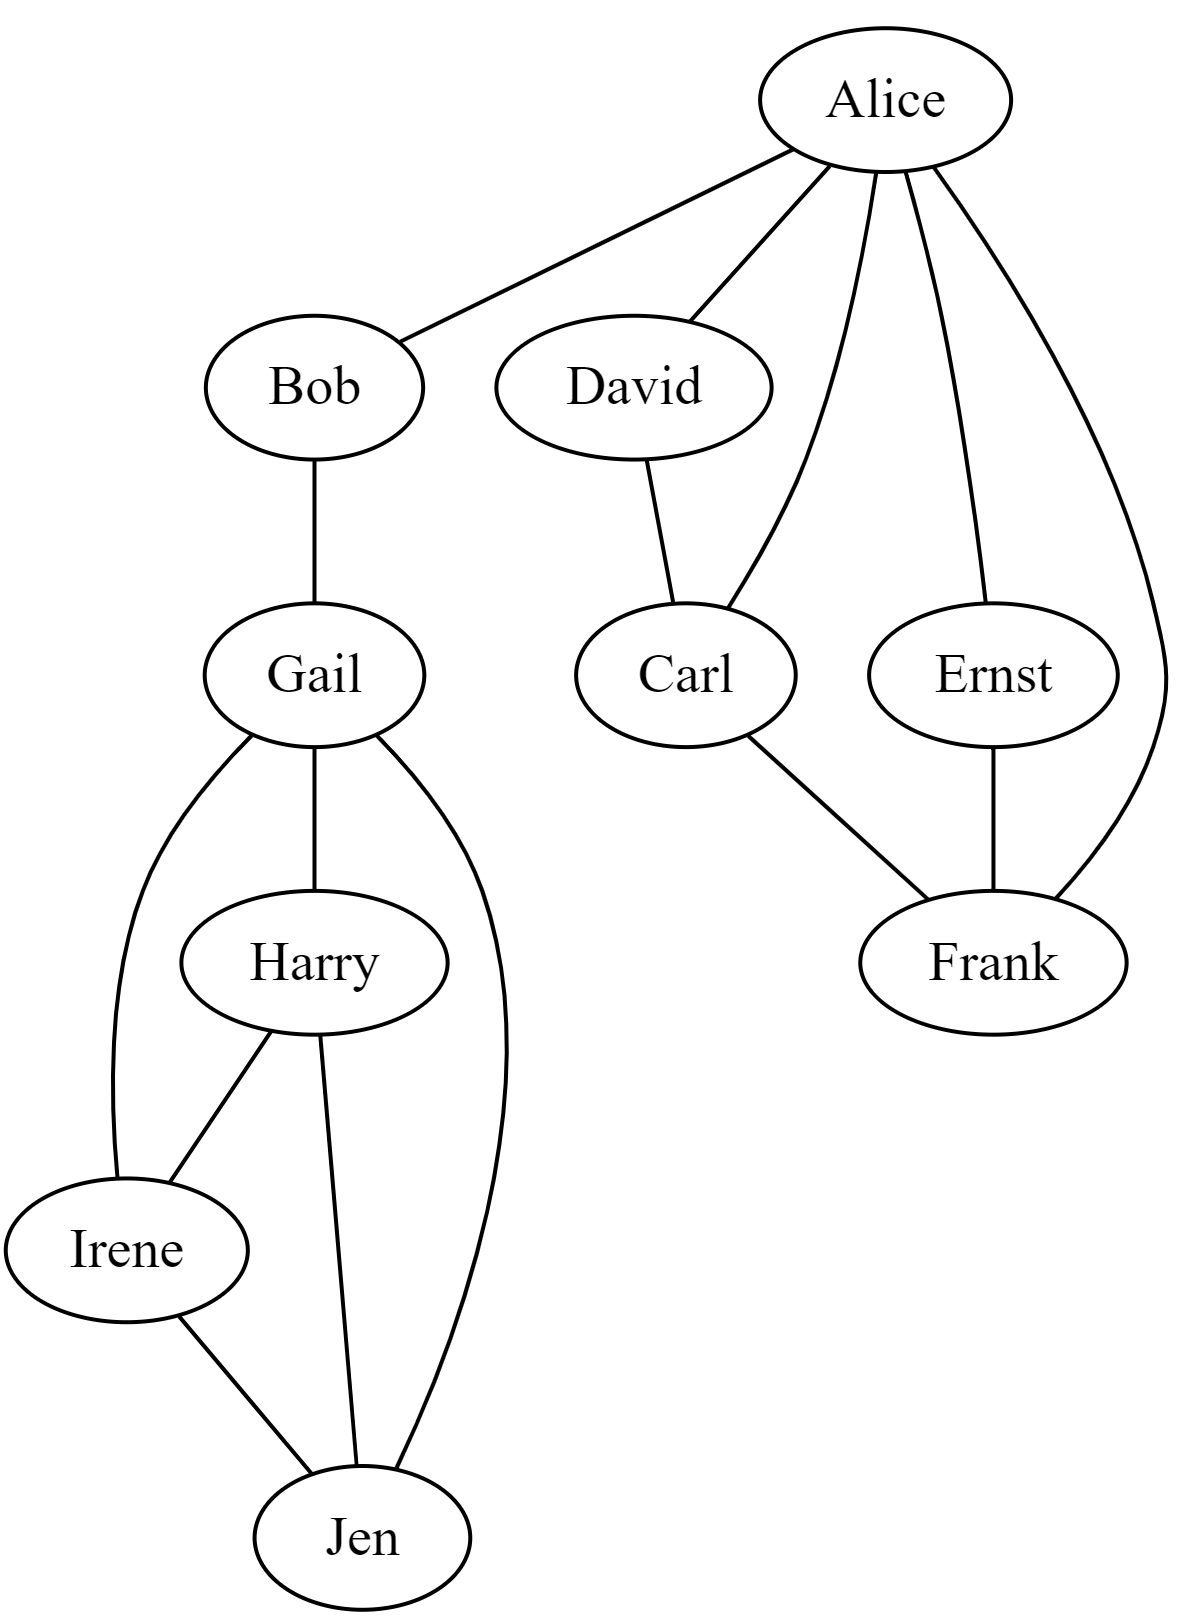

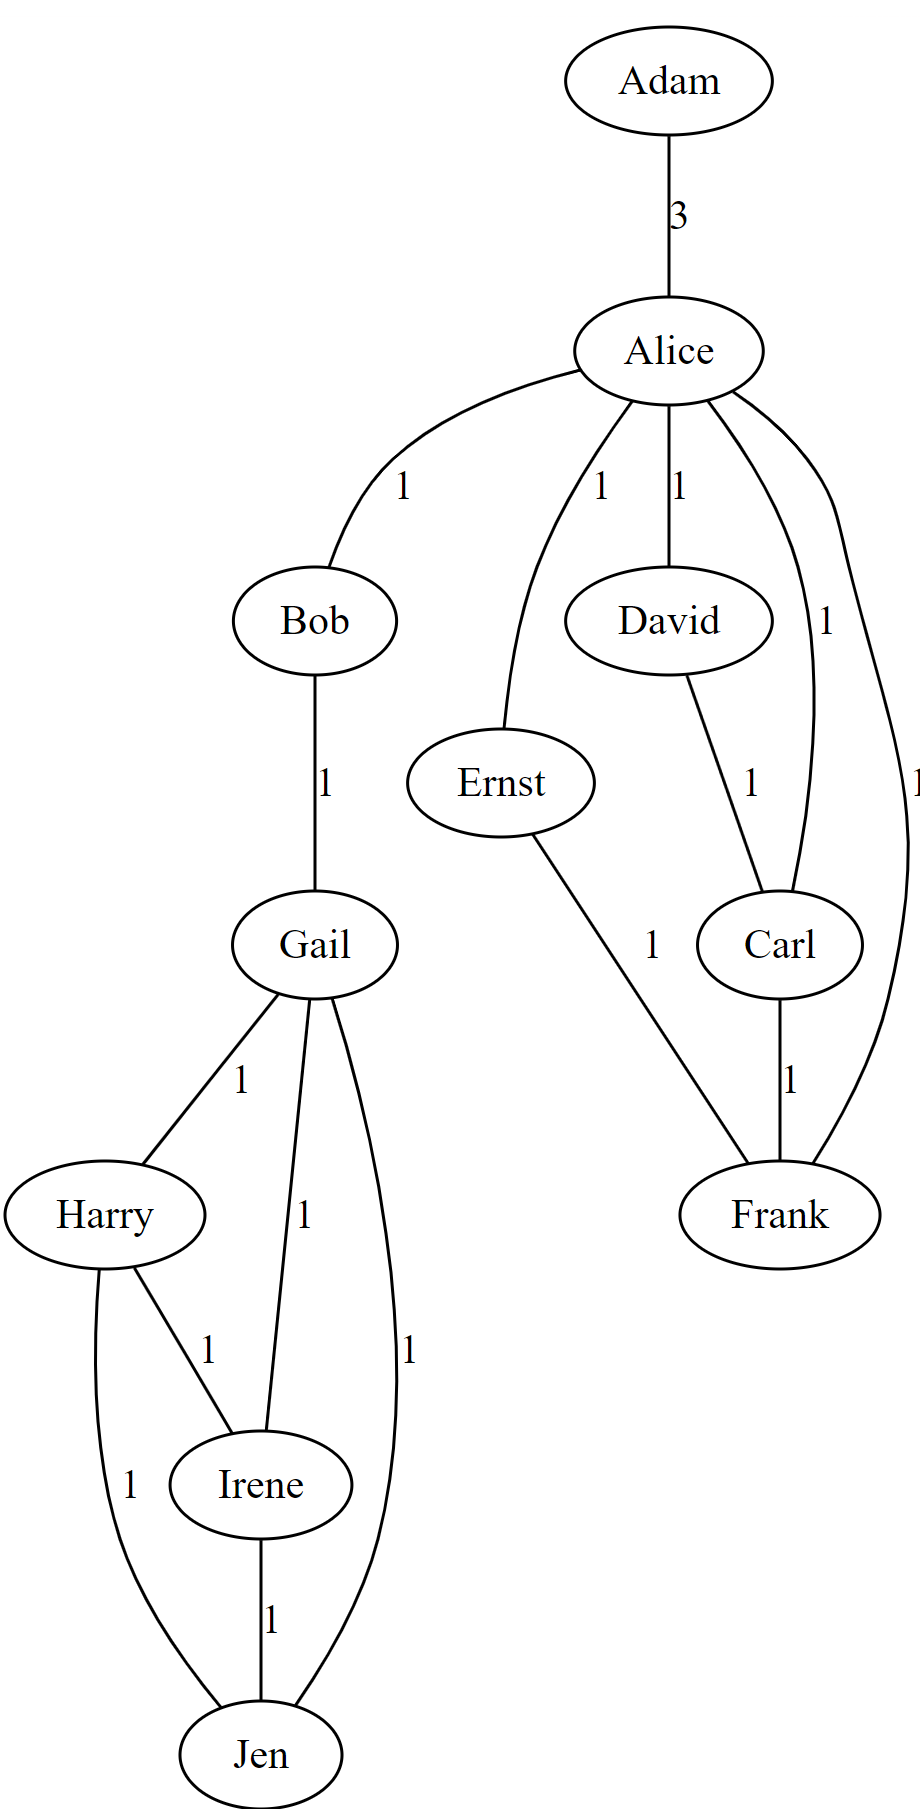